In [1]:
import os, pandas as pd
import datetime as dt

## Petrol.csv will hold all data
petrol_data = os.path.join(os.path.pardir,'data','raw','Petrol.csv')

In [2]:
## Petrol.csv file is headerless
df = pd.read_csv(petrol_data, names =['Date','Rate','Quantity','Amount','Meters'])

In [3]:
## Standarize date pattern
def to_date(txtdate):
    return (txtdate[:2] + '-' + txtdate[2:5] + '-'+ txtdate[-2:]) 

df['Date'] = df['Date'].apply(to_date)

## date was string
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df.head()

,Date,Rate,Quantity,Amount,Meters
0,2019-01-03,74.30,27.51,2044,498
1,2018-12-21,75.99,25.34,1926,471
2,2018-12-04,80.04,29.94,2396,536
3,2018-11-12,83.05,28.44,2361,525
4,2018-10-15,88.07,30.17,2657,540


In [7]:
## Computing milage
df['Kmpl'] = df['Meters'] / df['Quantity']
df.head()

,Date,Rate,Quantity,Amount,Meters,Kmpl
0,2019-01-03,74.30,27.51,2044,498,18.102508
1,2018-12-21,75.99,25.34,1926,471,18.587214
2,2018-12-04,80.04,29.94,2396,536,17.902472
3,2018-11-12,83.05,28.44,2361,525,18.459916
4,2018-10-15,88.07,30.17,2657,540,17.898575


In [8]:
df.describe()

,Rate,Quantity,Amount,Meters,Kmpl
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,80.957143,29.896190,2421.714286,537.380952,17.995394
std,4.224984,3.999546,353.098732,71.098155,0.902991
min,74.300000,25.340000,1926.000000,471.000000,16.039541
25%,77.530000,28.490000,2265.000000,501.000000,17.626753
50%,80.120000,29.100000,2396.000000,519.000000,17.851294
75%,84.140000,30.170000,2487.000000,545.000000,18.352335
max,89.530000,46.350000,3714.000000,817.000000,20.312500


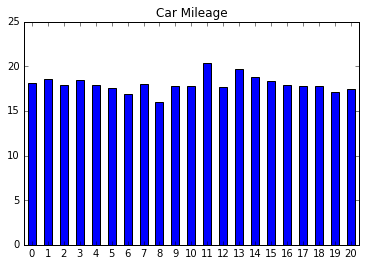

In [9]:
## See milage as bar
%matplotlib inline
df['Kmpl'].plot(x=df['Date'], y='Kmpl', kind='bar', rot=0, title='Car Mileage');

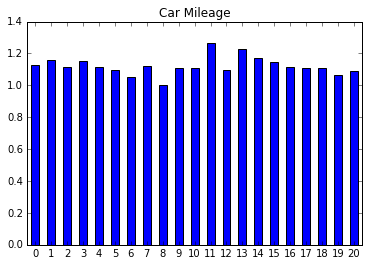

In [10]:
## Normalize
df['Kmpl'] = df['Kmpl']/df['Kmpl'].min()
df['Kmpl'].plot(x=df['Date'], y='Kmpl', kind='bar', rot=0, title='Car Mileage');